# PCA Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df.drop('ID', axis=1, inplace=True)
df.dropna(axis = 0, inplace = True) # remove empty values
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0


In [5]:
cat_columns = ['X2', 'X3', 'X4', 'Y']
high_corr_columuns = ['X6', 'X8', 'X9', 'X10', 'X11','X12', 'X13', 'X14', 'X15', 'X16']
cont_columns = [v for v in df.columns.values.tolist() if v not in (cat_columns + high_corr_columuns)]
print(cont_columns)

['X1', 'X5', 'X7', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [6]:
df2 = df[cont_columns].copy()
df2.head()

,X1,X5,X7,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,2.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,0.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,0.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,0.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [7]:
def generateCorrPlot(df: pd.DataFrame):
    plt.figure(figsize=[20,10])
    sns.heatmap(df.corr(), annot=True)
    plt.show()

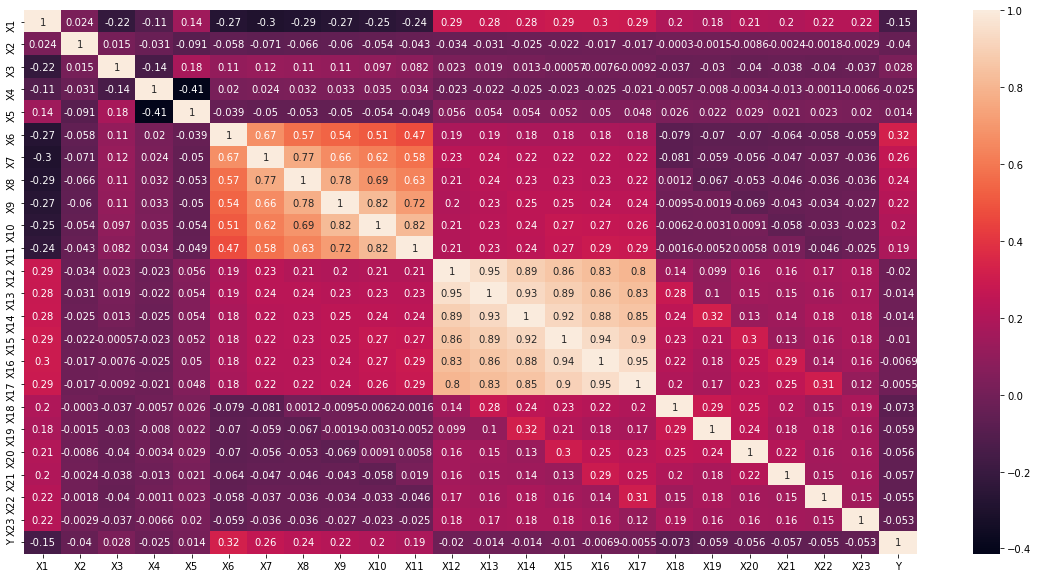

In [8]:
generateCorrPlot(df)

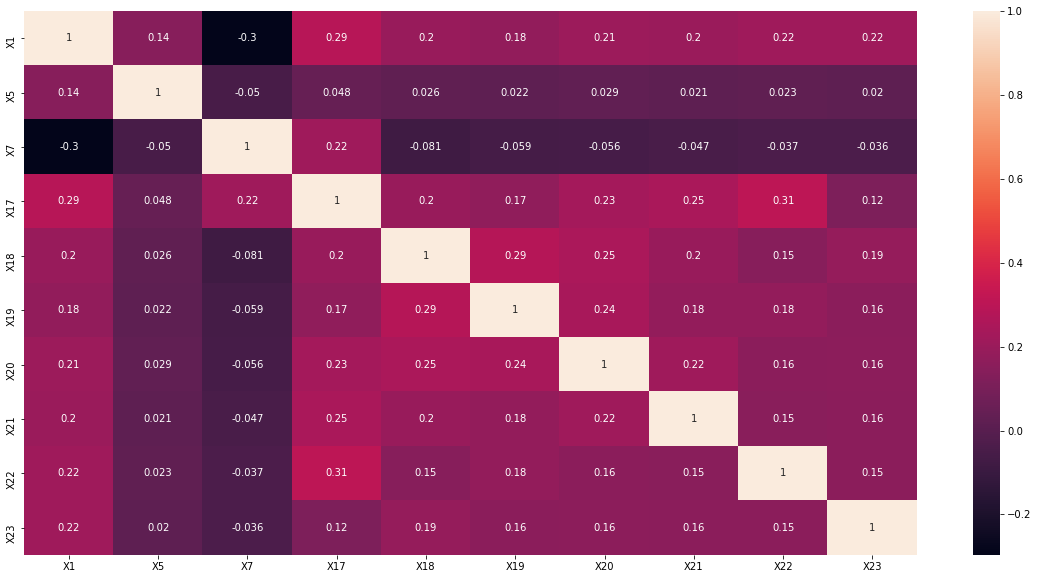

In [6]:
plt.figure(figsize=[20,10])
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [7]:
def getVarianceInfo(data: pd.DataFrame):
    totalVariance = data.var().sum()
    print('Total variance {0}'.format(totalVariance))
    for i in data.columns.values.tolist():
        variance = data[i].var()
        print(f'Varianza {i}: {((variance/totalVariance)*100).round(2)}%, value {variance}')
getVarianceInfo(df2)

Total variance 22294201234.90026
Varianza X1: 75.5%, value 16831766774.586897
Varianza X5: 0.0%, value 84.90367152819495
Varianza X7: 0.0%, value 1.4332178066846333
Varianza X17: 15.92%, value 3550119982.5176053
Varianza X18: 1.23%, value 274525912.78464437
Varianza X19: 2.38%, value 531578391.9148982
Varianza X20: 1.39%, value 310370604.0924965
Varianza X21: 1.1%, value 245743419.31487602
Varianza X22: 1.05%, value 233648119.87777698
Varianza X23: 1.42%, value 316447943.47417647


In [11]:
pcs.explained_variance_ratio_

array([0.24418812, 0.12663381, 0.10434856, 0.09258276, 0.08713637,
       0.08447684, 0.07577782, 0.0724608 , 0.06893113, 0.04346379])

In [8]:
# Escalando los datos
scaler = StandardScaler()
df3 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
#getVarianceInfo(df3)

In [9]:
pcs = PCA()
components = pcs.fit_transform(df3)
components.shape

(29958, 10)

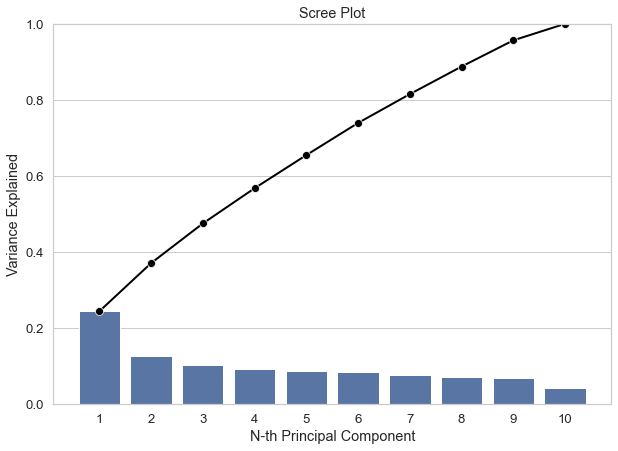

In [10]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()